# Linear Discriminant Analysis

## Lecture 3

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

Linear Discriminant Analysis (LDA) is a supervised machine learning technique used for dimensionality reduction and classification problems.
It is a linear method that project the data onto a lower-dimensional space while maximizing the separation between different classes.
LDA is a popular technique in the field of pattern recognition and is often used for image and speech recognition, as well as natural language processing.
Should not be confused with Latent Dirichlet Allocation, also called LDA, which is an unsupervised clustering algorithm.

The basic idea behind LDA is to find a linear combination of features that separates different classes as much as possible.
It does this by maximizing the ratio of between-class variance to within-class variance, known as the "Fisher criterion".
This results in a new set of features, called "discriminant functions", that can be used to separate the classes.

In practice, LDA is often used as a preprocessing step before applying a classifier such as logistic regression or support vector machines.
By reducing the dimensionality of the data, LDA can improve the performance of the classifier and make it more efficient.
Additionally, LDA can also be used as a standalone classifier, in which case the decision boundary is linear.

We wil not go into the details of how LDA works but we will look at how it can be implemented in Scikit-Learn:

## Scikit-learn example

Let's use the `make_classification` from Scikit-learn to generate some toy data with 2 informative features and 2 classes.

In [9]:
## Generate some data

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some toy data
# Parameters:
# n_samples: The number of samples to generate
# n_features: The number of features (independent variables)
# n_redundant: The number of redundant features (features that are linear combinations of other features)
# n_informative: The number of informative features (features that determine the target)
# n_clusters_per_class: The number of clusters per class (class = target)
# class_sep: The factor by which the classes are linearly separable (larger values make the problem easier)
# random_state: The seed used by the random number generator
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=0.75, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33, random_state=42)
X_train[0:5], y_train[0:5]

(array([[-0.47131493, -0.71420127],
        [ 0.46099872,  0.15604731],
        [-1.02509973,  0.8634649 ],
        [-1.70152462, -0.6246856 ],
        [-0.75544154,  1.27897328]]),
 array([0, 1, 0, 0, 0]))

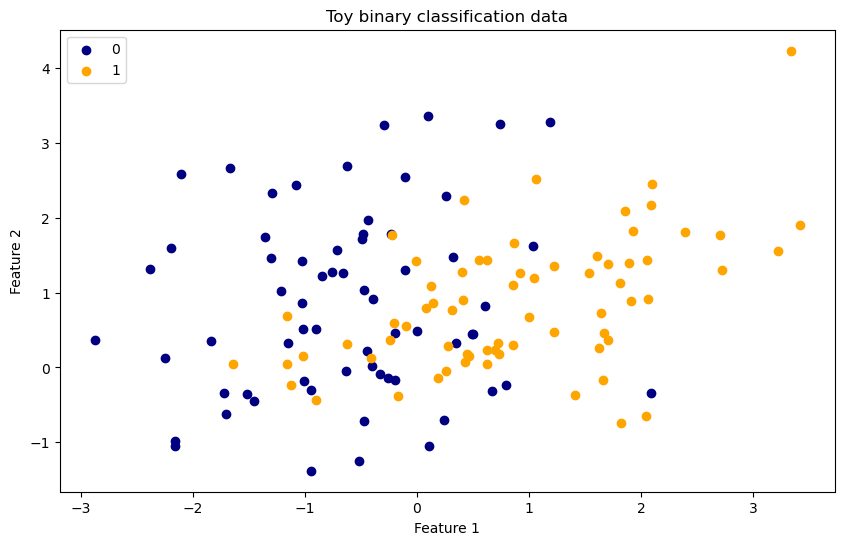

In [12]:
# Visualize data
plt.figure(figsize=(10, 6))
colors = ['navy', 'orange']
target_names = list(set(y))
for i, label in enumerate(target_names):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], label=label, c=colors[i])
plt.legend()
plt.title('Toy binary classification data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
# Fit the lda

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an instance of the LDA model
# n_components: The number of components to keep after transformation
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit the model to the data
lda.fit(X_train, y_train)

# We can now project the data onto a lower dimensional space

X_transformed = lda.transform(X_train)
#X_transformed

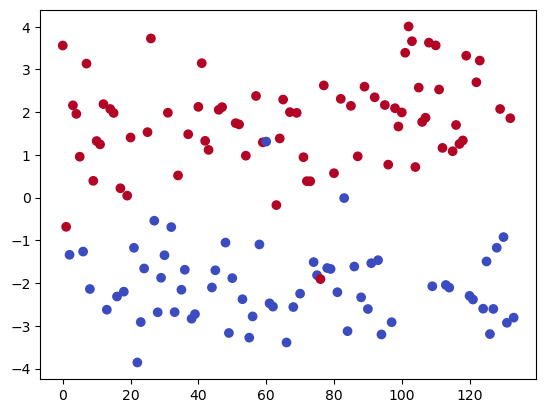

In [4]:
# We can plot the LDA component
plt.scatter(range(len(X_transformed)), X_transformed, c=y_train, cmap=plt.cm.coolwarm)

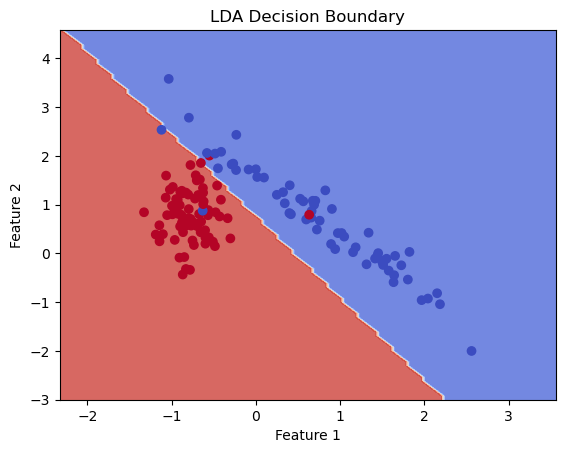

In [5]:
# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the original data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA Decision Boundary')
plt.show()

## Evaluate on the test set

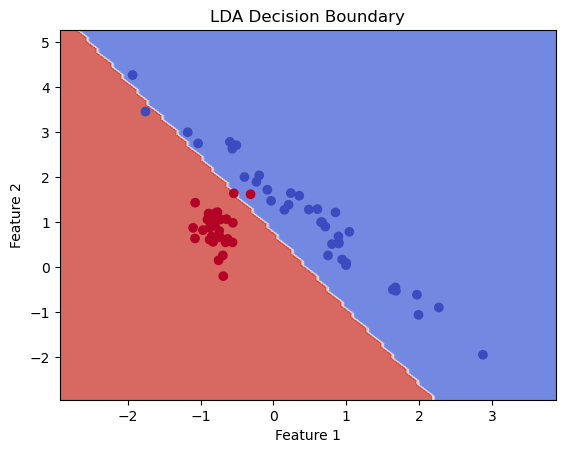

In [6]:
# Plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the original data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA Decision Boundary')
plt.show()

In [7]:
plt.show()
lda.score(X_test, y_test)

0.9696969696969697

# Linear Discriminant Analysis of the iris dataset

Here we load the Iris dataset from scikit-learn, which includes 150 samples of iris flowers, each with 4 features (sepal length, sepal width, petal length, and petal width). Next, we split the data into a training set and a test set.

We create an instance of the LinearDiscriminantAnalysis class and set the number of components to 2. This reduces the dimensionality of the data from 4 to 2, allowing for easier visualization.

Finally, we use the fit_transform method on the training data to fit the LDA model and transform the data. Then we use the transform method on the test data to transform it using the LDA model learned from the training set.

It's important to note that LDA is a supervised method, and it requires the class labels to be passed as an argument in the fit method (y_train) in order to learn the class means and variances.

We also create a scatter plot of the transformed data, where the x-axis corresponds to the first linear discriminant (LD1) and the y-axis corresponds to the second linear discriminant (LD2). The color of each point represents the class label of the corresponding sample.

With this plot, it's easy to see how the LDA has separated the different classes of iris flowers based on the two linear discriminants. This can be useful for visualizing the structure of the data and for understanding how well the LDA algorithm is able to separate the classes.

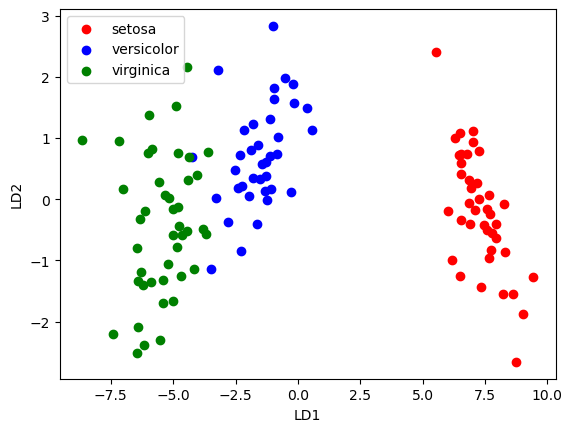

In [8]:
from sklearn.datasets import load_iris # Importing the iris dataset

iris = load_iris()
X2, y2 = iris.data, iris.target

# Split the data into a train and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=10)

# Creating an instance of LinearDiscriminantAnalysis and setting number of components to 2
lda = LinearDiscriminantAnalysis(n_components=2)

# Fitting and transforming the training data
X_train_lda = lda.fit_transform(X_train2, y_train2)

# Transforming the test data using the model learned from training data
X_test_lda = lda.transform(X_test2)

# assign label to each type of flower
target_names = iris.target_names
colors = ['red', 'blue', 'green']
for i, label in enumerate(target_names):
    plt.scatter(X_train_lda[y_train2==i, 0], X_train_lda[y_train2==i, 1], label=label, c=colors[i])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

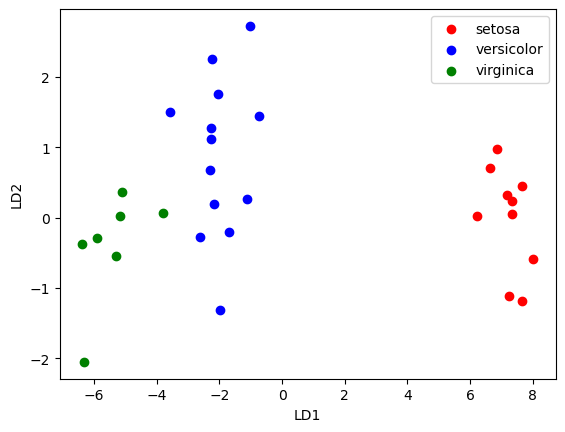

In [9]:
# Plot the separation of the test data

# assign label to each type of flower
target_names = iris.target_names
colors = ['red', 'blue', 'green']
for i, label in enumerate(target_names):
    plt.scatter(X_test_lda[y_test2==i, 0], X_test_lda[y_test2==i, 1], label=label, c=colors[i])

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()